In [52]:
# import feather
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# from ipywidgets import interact, FloatSlider
# import warnings
# warnings.filterwarnings("ignore")
plt.rcParams['font.sans-serif'] = ['SimHei']  # 中文字体设置  
plt.rcParams['axes.unicode_minus'] = False
# import statsmodels.api as sm
import seaborn as sns
from numpy.lib.stride_tricks import as_strided as stride
import scipy.optimize as scopt

In [81]:
stock_data = pd.read_csv("../data/hs300_data.csv",index_col=0)
stock_data["date"] = pd.to_datetime(stock_data["date"])
stock_data["date"] = pd.to_datetime(stock_data["date"])
stock_data["open"] *= stock_data["cumadj"]
stock_data["high"] *= stock_data["cumadj"]
stock_data["low"] *= stock_data["cumadj"]
stock_data["close"] *= stock_data["cumadj"]
stock_data["vwap"] = stock_data["amount"]/stock_data["volume"]
# stock_data.set_index(["date","stk_id"],inplace=True)

In [2]:
from reverse import reverse_strategy
from backtest import performance
from Alpha191_first20 import Alpha191_first20
from Markowitz_MV import Mean_Variance_strategy

## n日反转策略

In [3]:
result = reverse_strategy(start_time = "2020-01-20", end_time = "2022-07-31", backlength = 20, stock_list_name="zz1000", fee = 0.0003)

stk_id      present_value  mean_daily_ret
date                                     
2020-01-20       1.000000        0.000000
2020-01-21       1.000000        0.000000
2020-01-22       1.000000        0.000000
2020-01-23       1.000000        0.000000
2020-02-03       1.000000        0.000000
...                   ...             ...
2022-07-25       1.155540       -0.003018
2022-07-26       1.163695        0.007057
2022-07-27       1.166767        0.002640
2022-07-28       1.169927        0.002708
2022-07-29       1.165611       -0.003689

[612 rows x 2 columns]


## 回测表现

{'开始时间': '2020-01-20',
 '结束时间': '2022-07-31',
 '超额收益': '6.42%',
 '年化收益': '6.27%',
 '年化波动': '12.90%',
 '夏普比率': '0.49',
 '最大回撤': '23.48%'}

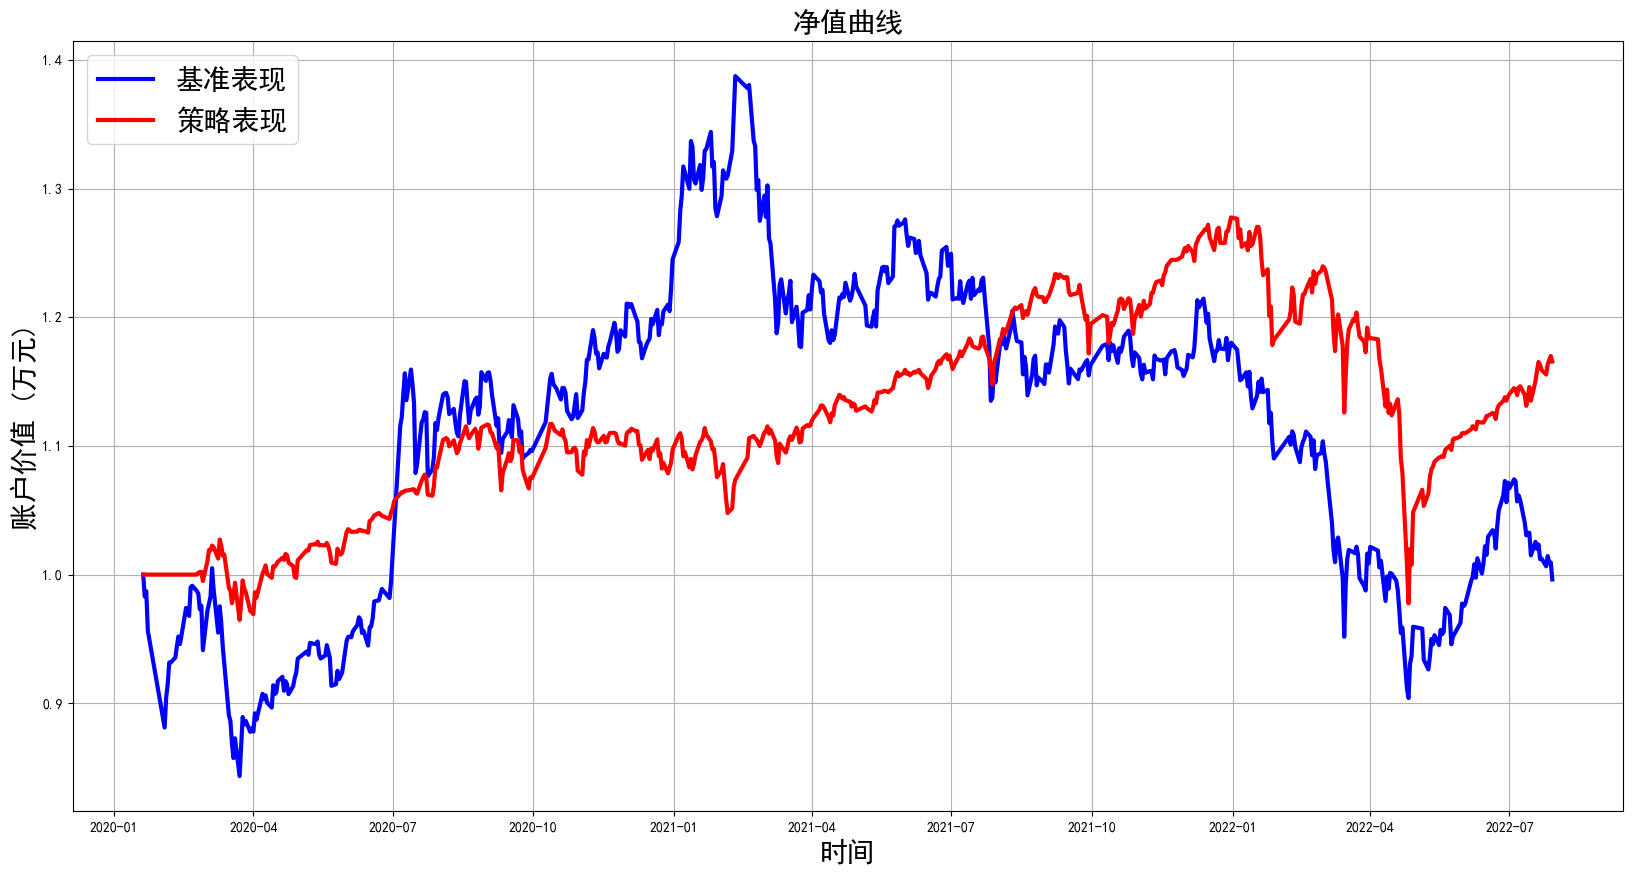

In [50]:
#默认情况下基准表现为沪深300指数
performance(start_time="2020-01-20", end_time="2022-07-31", pv=result[0]["present_value"]).get_performance()

{'开始时间': '2020-01-20',
 '结束时间': '2022-07-31',
 '超额收益': '-1.06%',
 '年化收益': '6.27%',
 '年化波动': '12.90%',
 '夏普比率': '0.49',
 '最大回撤': '23.48%'}

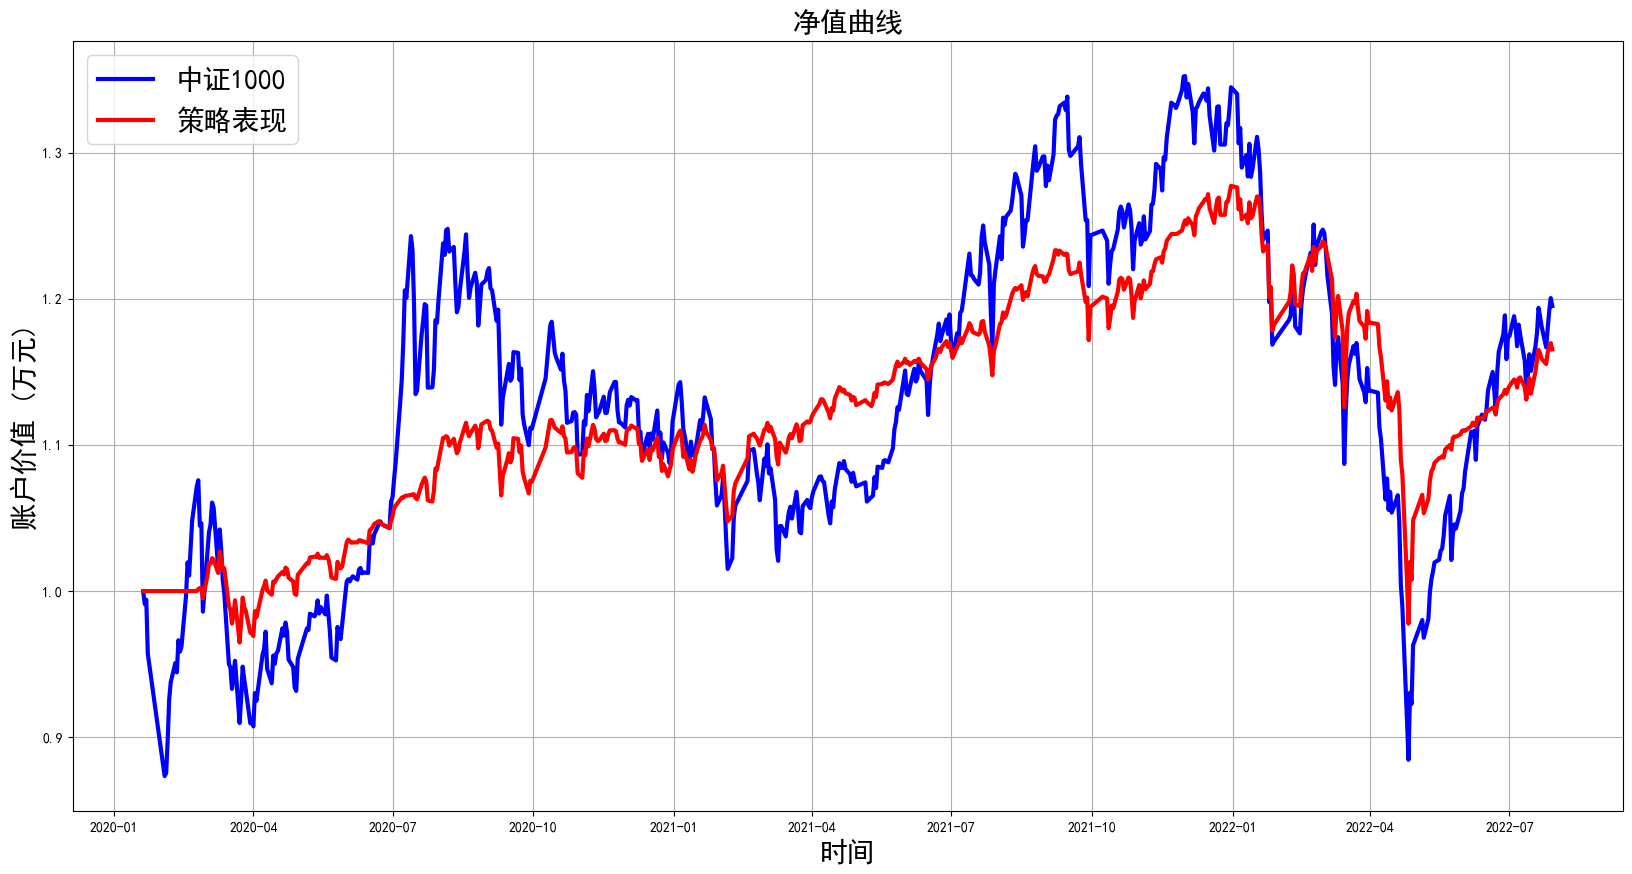

In [51]:
#与中证1000指数对比
performance(start_time="2020-01-20", end_time="2022-07-31", pv=result[0]["present_value"], benchmark_name="中证1000").get_performance()

## 均值-方差策略

In [144]:
result = Mean_Variance_strategy(start_time= "2020-01-20", end_time="2020-07-31", freq= 20,
                       stock_list = stock_data["stk_id"].unique()[:10], fee = 0.0003)

20
1 0.9997 1.0167123427784264 1.0
40
1.0214886639869065 0.999562264 0.9970108563230633 1.45912
60
0.9931332104122385 0.999587398 0.9908297122728253 1.37534
80
1.0035963035051108 0.999729208 1.008524410477795 0.90264
100
0.9975545852926353 0.999575536 0.9951753389498452 1.41488
120
1.0104682843608617 0.999751018 1.001604680977689 0.8299399999999999
140
0.9984913059496994 0.999656416 0.9920989800929887 1.14528
160
1.0016179069770752 0.999892252 1.0089052543451662 0.35916
180
0.9956501990782833 0.999761032 1.0150364724132794 0.7965599999999999
200
0.9962538298292369 0.999684562 1.0112365231043314 1.05146
220
0.9984958359195917 0.999864856 1.0062518383514854 0.45048000000000005
240
1.0118666671899852 0.999648859 0.9977710980932861 1.17047
260
0.9879292696108605 0.99971014 1.0053204448134754 0.9662000000000001
280
0.992478604022571 0.999673021 0.9719634488023475 1.0899299999999998
300
0.9988070640366592 0.999829663 0.9943238995935587 0.56779
320
0.9985980476490152 0.999518011 1.00494200617

{'开始时间': '2020-03-20',
 '结束时间': '2021-01-31',
 '超额收益': '17.54%',
 '年化收益': '30.39%',
 '年化波动': '25.80%',
 '夏普比率': '1.18',
 '最大回撤': '10.44%'}

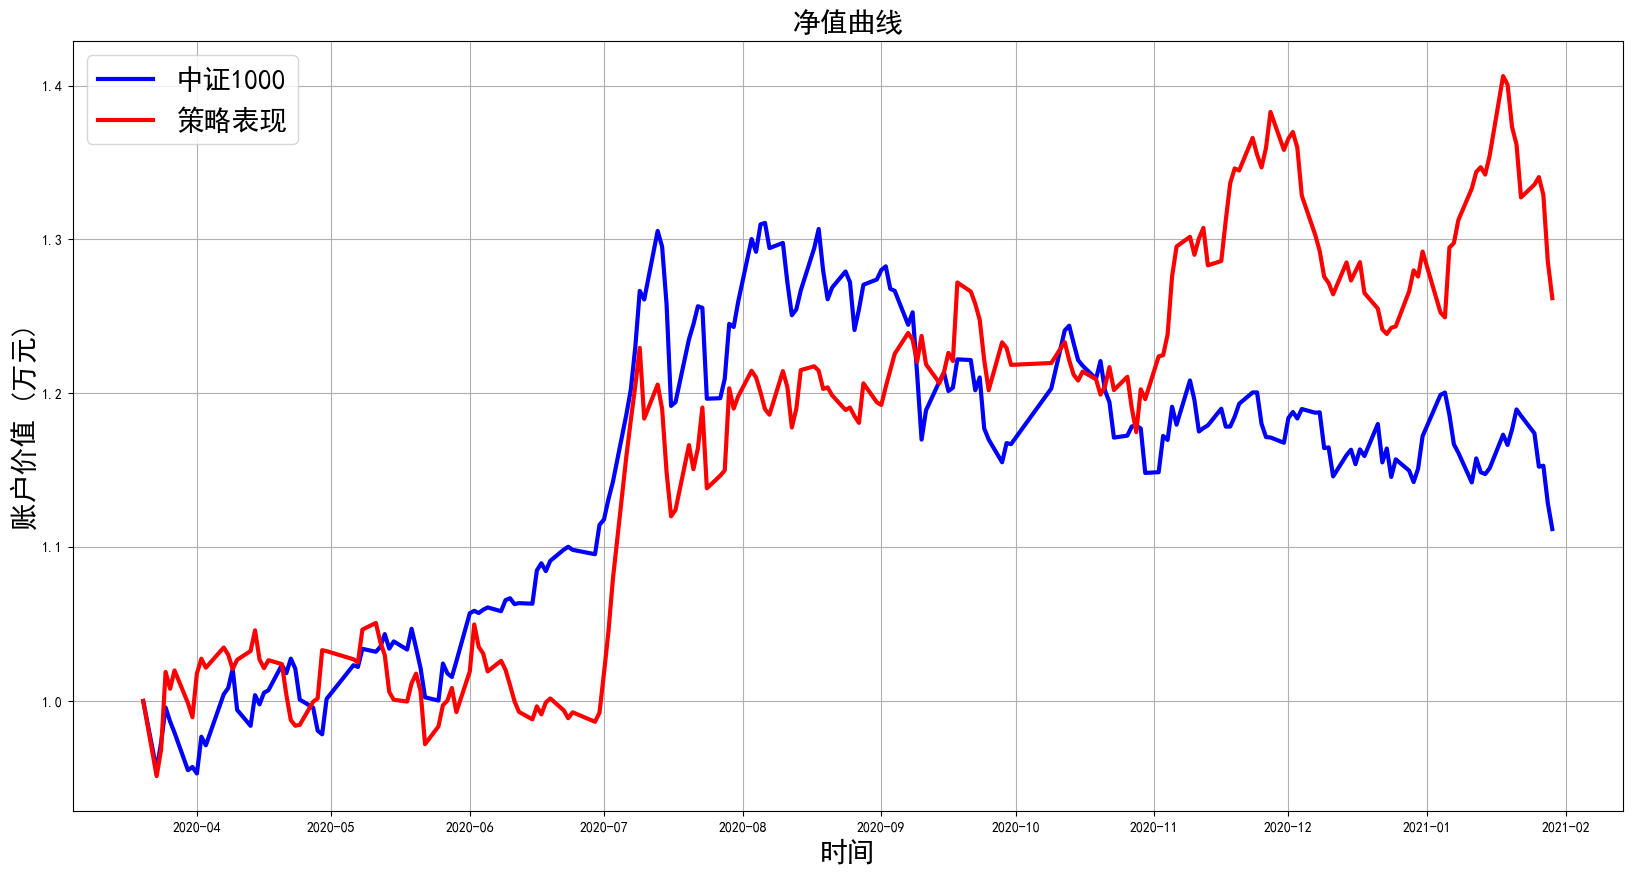

In [152]:
performance(start_time="2020-03-20", end_time="2021-01-31", pv=result[0], benchmark_name="中证1000").get_performance()

## 因子生成（这里做了国泰君安的Alpha191的前20个因子）

In [68]:
stock_data = feather.read_dataframe("../data/stk_daily.feather")
stock_data["open"] *= stock_data["cumadj"]
stock_data["high"] *= stock_data["cumadj"]
stock_data["low"] *= stock_data["cumadj"]
stock_data["close"] *= stock_data["cumadj"]
stock_data["vwap"] = stock_data["amount"]/stock_data["volume"]

stock_data.set_index(["date","stk_id"],inplace=True)

In [76]:
Alpha191_first20.alpha008(stock_data).tail()

stk_id,000001.SZ,000002.SZ,000008.SZ,000060.SZ,000063.SZ,000069.SZ,000100.SZ,000157.SZ,000166.SZ,000333.SZ,...,601989.SH,601991.SH,601992.SH,601997.SH,601998.SH,603160.SH,603799.SH,603833.SH,603858.SH,603993.SH
date,,,,,,,,,,,,,,,,,,,,,
2022-12-26,0.299320,0.986395,0.663265,0.700680,0.918367,0.649660,0.510204,0.874150,0.312925,0.761905,...,0.408163,0.435374,0.445578,0.506803,0.350340,0.227891,0.945578,0.105442,0.914966,0.554422
2022-12-27,0.075085,0.982935,0.505119,0.795222,0.201365,0.880546,0.648464,0.849829,0.474403,0.174061,...,0.597270,0.621160,0.679181,0.607509,0.641638,0.153584,0.931741,0.058020,0.969283,0.638225
2022-12-28,0.061224,0.993197,0.622449,0.258503,0.156463,0.877551,0.445578,0.778912,0.431973,0.795918,...,0.530612,0.312925,0.649660,0.418367,0.482993,0.227891,0.962585,0.173469,0.921769,0.319728
2022-12-29,0.132653,0.993197,0.605442,0.241497,0.217687,0.877551,0.636054,0.850340,0.469388,0.914966,...,0.435374,0.343537,0.653061,0.374150,0.561224,0.180272,0.870748,0.163265,0.897959,0.329932
2022-12-30,0.047458,1.000000,0.623729,0.261017,0.088136,0.935593,0.640678,0.884746,0.515254,0.277966,...,0.545763,0.335593,0.542373,0.400000,0.352542,0.813559,0.949153,0.216949,0.881356,0.410169


In [73]:
Alpha191_first20.alpha020(stock_data).tail()

stk_id,000001.SZ,000002.SZ,000008.SZ,000060.SZ,000063.SZ,000069.SZ,000100.SZ,000157.SZ,000166.SZ,000333.SZ,...,601989.SH,601991.SH,601992.SH,601997.SH,601998.SH,603160.SH,603799.SH,603833.SH,603858.SH,603993.SH
date,,,,,,,,,,,,,,,,,,,,,
2022-12-26,-4.272864,-5.211558,-4.132231,-3.563260,-4.821564,-5.882353,-4.579794,-4.498270,-3.414634,-4.629630,...,-3.056706,-6.228374,-5.992117,-3.914033,-4.545455,-2.768166,-4.771668,-0.280227,-13.741064,-5.428248
2022-12-27,0.536810,-4.341085,-0.425532,0.489325,-0.425861,-1.978417,-1.832461,-1.245552,-0.250000,-1.378539,...,-0.848634,-1.817822,-1.537230,-1.270417,-1.606996,0.336879,-4.472873,-0.762746,-7.595486,-1.070950
2022-12-28,2.978056,-0.694816,-2.118644,0.978324,-0.827097,0.000000,-3.116519,-1.795332,0.251256,0.930774,...,-1.415260,1.094149,-1.166079,0.731261,1.633242,-0.593210,-4.640955,3.263069,-8.034117,0.649641
2022-12-29,1.086113,-2.887701,-1.716738,-0.243309,1.630867,-4.864865,-1.334076,-2.517986,0.253185,0.096749,...,-0.283717,-0.366666,-2.712773,0.735294,0.000000,3.064978,-4.193769,2.447847,-6.701708,-0.651887
2022-12-30,1.621622,-2.829685,-0.432900,1.234568,3.522818,-3.090909,0.540919,-0.910747,0.760157,-0.766284,...,0.286166,4.493999,-1.549156,0.734529,1.014199,1.209677,-4.530633,0.272277,-5.995526,0.442082
